In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv('data/housing.csv', encoding_errors='ignore')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#1 categorical variable - let's look at it
print(set(df.ocean_proximity))
df.ocean_proximity.value_counts()

{'NEAR BAY', 'ISLAND', 'INLAND', 'NEAR OCEAN', '<1H OCEAN'}


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


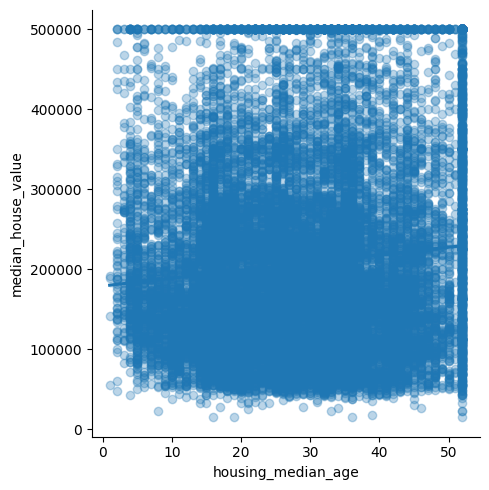

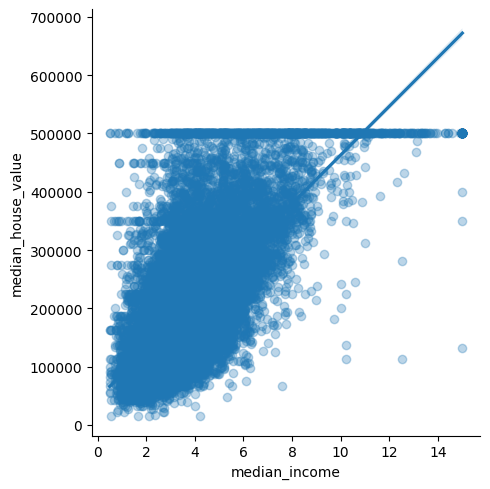

In [6]:
sns.lmplot(x='housing_median_age', y='median_house_value', data=df, scatter_kws={'alpha':0.3})
sns.lmplot(x='median_income', y='median_house_value', data=df, scatter_kws={'alpha':0.3})

Text(0, 0.5, 'Median House value')

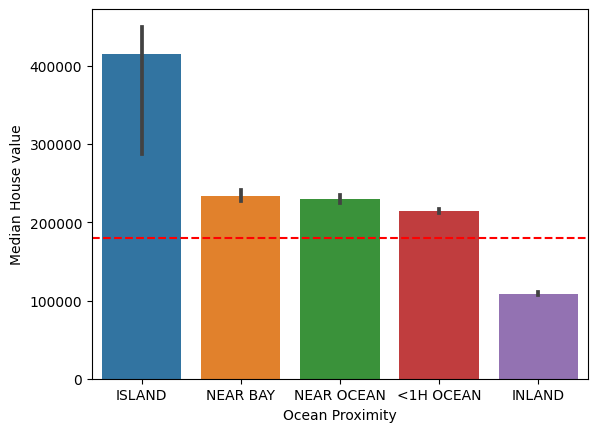

In [7]:
#let's check median price per ocean proximity
plot  = sns.barplot(x='ocean_proximity', y='median_house_value', data=df, estimator='median', order=df.groupby('ocean_proximity')['median_house_value'].median().sort_values(ascending=False).index)
plot.axhline(df.median_house_value.median(), color='red', ls='--')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House value')

<AxesSubplot: >

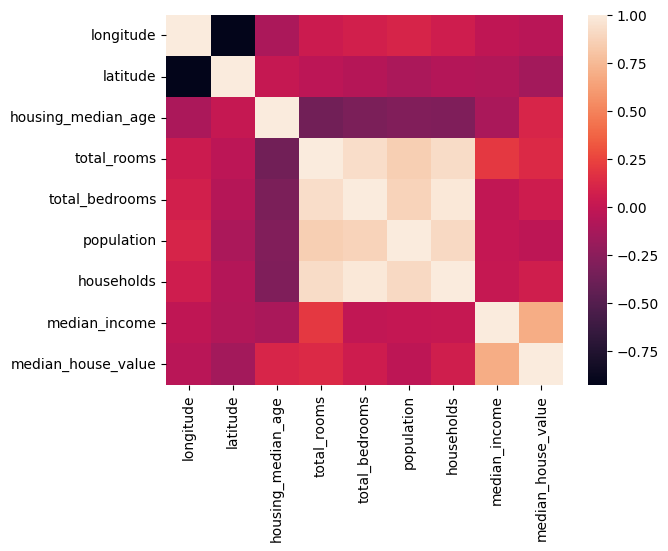

In [8]:
sns.heatmap(df.corr())

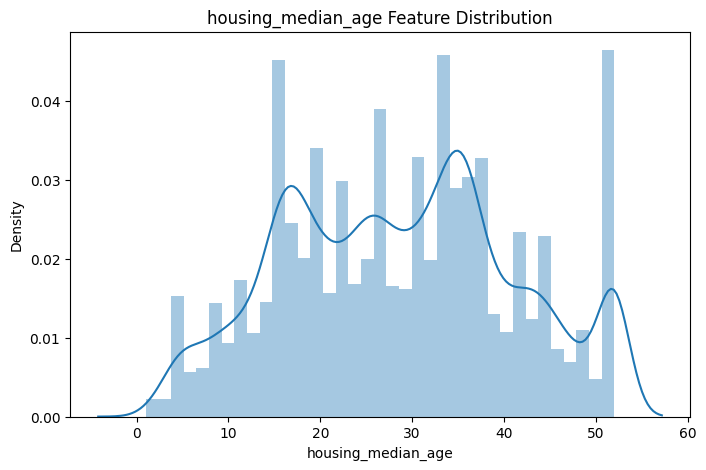

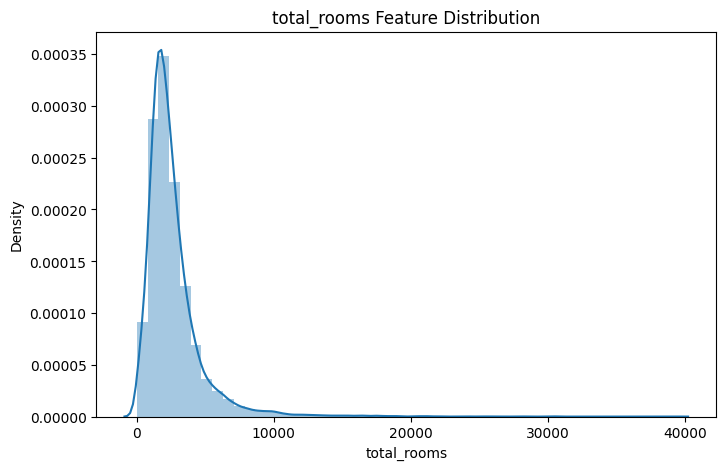

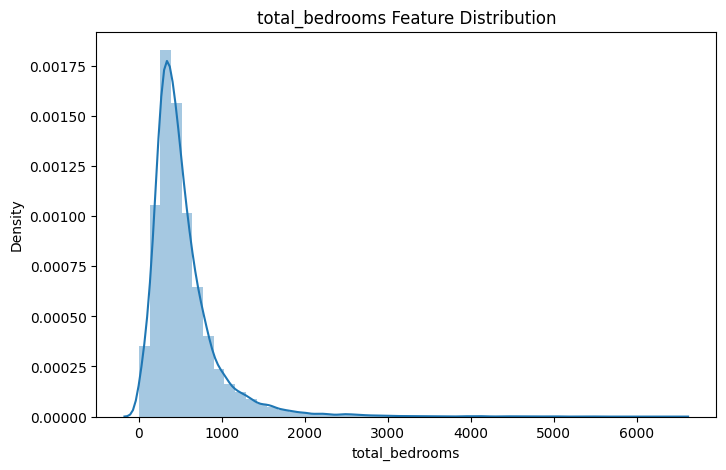

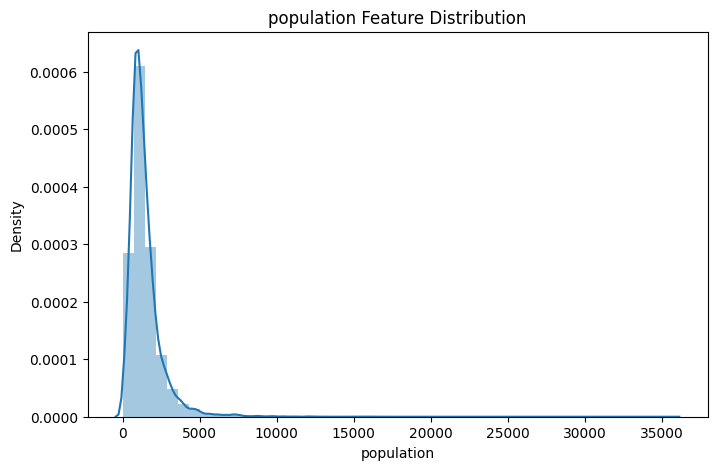

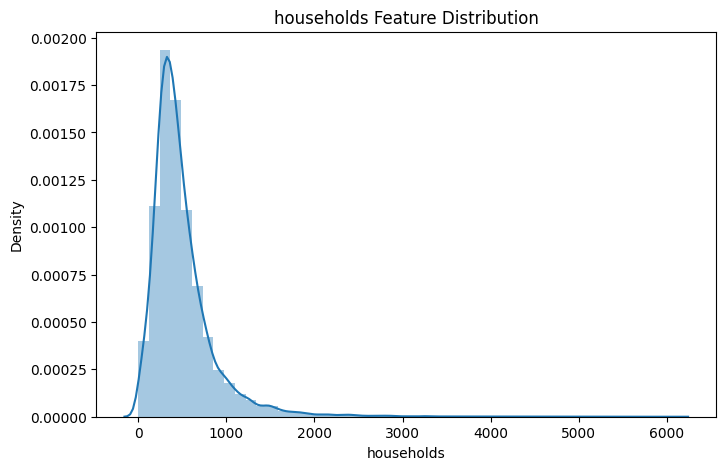

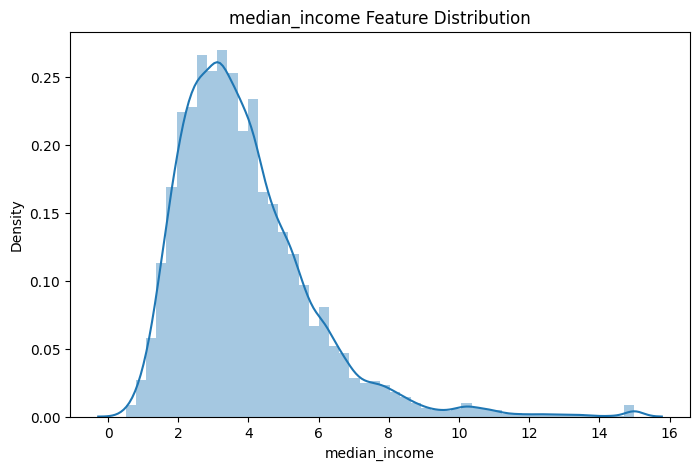

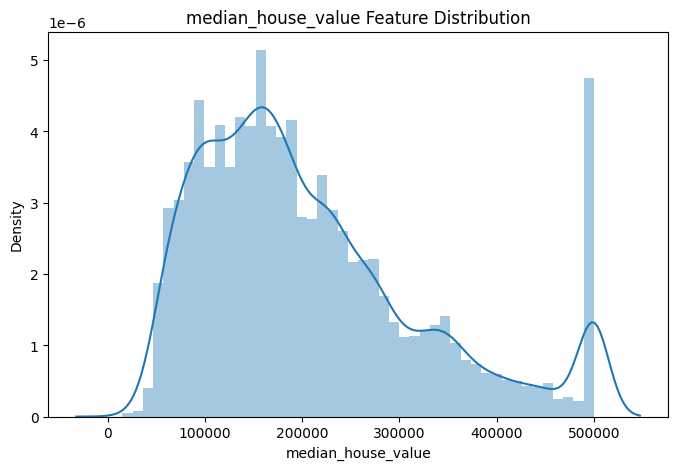

In [9]:
#let's see the distribution

cols_to_check = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for col in cols_to_check:
    plt.figure(figsize=(8,5))
    plt.title(col+' Feature Distribution')
    sns.distplot(df[col])

# Data preprocessing

In [10]:
#there is only one column we need to handle nulls
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
#let's see in a bit details
df[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [12]:
#df['total_bedrooms'] = df.total_bedrooms.fillna(df.total_bedrooms.median())
df = df[~df['total_bedrooms'].isna()]
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
df['ocean_proximity_encoded'] = LabelEncoder().fit_transform(df.ocean_proximity)

proximity_dict = df.groupby('ocean_proximity')['ocean_proximity_encoded'].min()
proximity_dict

ocean_proximity
<1H OCEAN     0
INLAND        1
ISLAND        2
NEAR BAY      3
NEAR OCEAN    4
Name: ocean_proximity_encoded, dtype: int32

In [14]:
df = df.drop('ocean_proximity', axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [15]:
X = df.drop('median_house_value', axis=1)
#X = StandardScaler().fit_transform(X)
y = df.median_house_value

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
for i in [X_train, X_test, y_train, y_test]:
    print(len(i))

15324
5109
15324
5109


# Building a model and predicting

In [17]:
for model in [LinearRegression(), KNeighborsRegressor(n_neighbors=200), RandomForestRegressor(n_estimators=100)]:
    mod = model.fit(X_train,y_train)
    print(model.score(X_test, y_test))

0.6245234649924052
0.2451275854177296
0.8167607893219585


In [18]:
model = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)
model.score(X_test, y_test)

0.8179852773268753

In [19]:
# let's predict the price for San Jose city (-121.89, 37.33) 25 year building, 1200 total rooms and 300 total bedrooms, 500 population, 200 households, median income 3.5 and Inland ocean proximity.

np.round(model.predict([[-121.89, 37.33, 25, 1200, 300, 500, 200, 3.5, 1]]),2)

array([174965.])

In [20]:
#saving the model
import pickle

with open('model_pickle.pkl', 'wb') as f:
    pickle.dump(model,f)

In [21]:
#making sure it runs

with open('model_pickle.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

np.round(loaded_model.predict([[-121.89, 37.33, 25, 1200, 300, 500, 200, 3.5, 1]]),2)

array([174965.])